In [12]:
import networkx as nx
import numpy as np
import random
import os
import matplotlib.pyplot as plt
import time
from collections import Counter
%matplotlib inline 
from tqdm import tqdm
from numpy.random import choice

# parameters

alpha = 0.15
a = [1, 2, 4]

def read_folder() : # ok
    all_files = sorted(os.listdir(path = "D:/Download/cai/"))
    # print(all_files)
    return all_files

def envolving_graph(file):    
    f = open(file)
    G = nx.Graph()

    n_lines = len(f.readlines())
    # print(n_lines)
    f = open(file)
    line = f.readline()
    # print(line)
    line = f.readline()
    # print(line)
    line = f.readline()
    # print(line)
    line = f.readline()
    # print(line)
    line = f.readline()
    # print(line)
    line = f.readline()
    # print(line)
    line = f.readline()
    # print(line)
    line = f.readline()
    for i in range(8, n_lines) :
        line = f.readline()      
        line = line[:-1]
        line = line.split("\t")
        a = int(line[0])
        b = int(line[1])
        G.add_edge(a,b)

    f.close()
    return G

def current_graph(file) :
    f = open(file)
    r = nx.Graph()

    n_lines = len(f.readlines())
    # print(n_lines)
    f = open(file)
    line = f.readline()
    # print(line)
    line = f.readline()
    # print(line)
    line = f.readline()
    # print(line)
    line = f.readline()
    # print(line)
    line = f.readline()
    # print(line)
    line = f.readline()
    # print(line)
    line = f.readline()
    # print(line)
    line = f.readline()
    for i in range(8, n_lines):
        line = f.readline()
        line = line[:-1]
        line = line.split("\t")
        a = int(line[0])
        b = int(line[1])
        r.add_edge(a, b)
        
    f.close()
    return r

def update_graph(graph, newnode) :
    G = graph
    E = list(G.edges())

    edge = random.choice(E)
    u = edge[0]
    v = edge[1]

    # change of head
    G.remove_edge(u,v)
    u = newnode
    G.add_edge(u, v)

    return G # new graph

def prportional_probing(current_graph, pagerank) :
    # print(dict(sorted(pagerank.items())).values())
    # print(sorted(list(current_graph.nodes())))
    picked_node = choice(sorted(list(current_graph.nodes())), p=list(dict(sorted(pagerank.items())).values()))                           
    return picked_node

def PowerIteration(graph) :
    V = list(graph.nodes())
    n = len(V)
    for i in range(len(V)):
        v = V[i]
        graph.nodes[v]["old_pi"] = 1/n
        graph.nodes[v]["new_pi"] = 1/n

    # power iterations
    iterations_count = 0
    while True:
        iterations_count += 1  # (pi(1)->pi(t))
        # iterate
        for i in range(len(V)):
            v = V[i]
            graph.nodes[v]["old_pi"] = graph.nodes[v]["new_pi"]
            graph.nodes[v]["new_pi"] = 0

        for i in range(len(V)):
            v = V[i]
            temp = 0
            for u in graph.neighbors(v):
                temp += graph.nodes[u]["old_pi"] / len(list(graph.neighbors(u)))
            graph.nodes[v]["new_pi"] = (1 - alpha) * temp + alpha / n

        # check convergence
        tol = 0
        for i in range(len(V)):
            v = V[i]
            tol += np.abs(graph.nodes[v]["old_pi"] - graph.nodes[v]["new_pi"])

        if tol < 1e-9:
            # print("convergence")
            break

    # set an attribute true pagerank pi to all nodes

    pagerank = {}
    for i in range(len(V)):
        v = V[i]
        pagerank[v] = graph.nodes[v]["new_pi"]
        graph.nodes[v]["real.pi"] = graph.nodes[v]["new_pi"]

    return pagerank

def L_error(true_pi, estimated_pi) :
    # L1 = sum of (estimated_pi - true_pi) at any time step t
    # Linfinity = max error of pagerank
    
    list = []
    for key in true_pi:
        if key not in list:
            list.append(key)

    for key in estimated_pi:
        if key not in list:
            list.append(key)
     
    check= len(set(list)) == len(list)
    
    if(check) : # whether all distinct node
        print("True")
    else :
        print("false")
        
    # print(true_pi[list[1]])
    # print(estimated_pi[list[1]])
    # print(list[1])
    # print(len(list))    
    result = np.zeros(len(list))

    # print(estimated_pi(list[1]))
    # print(len(list))
    
    count = 0
    for i in range(len(list)) :
        if((list[i] in estimated_pi) and (list[i] in true_pi )) :
            result[i] = abs((estimated_pi[list[i]])-(true_pi[list[i]]))          
        elif ((list[i] in estimated_pi) and (list[i] not in true_pi)) :
            result[i] = estimated_pi[list[i]]            
        else :
            result[i] = true_pi[list[i]] 
        count+=result[i]
        
    # print(count)
    # print(max(result))
    return count , max(result)


In [13]:
list_of_file = read_folder()

for i in range(len(list_of_file)) :
    list_of_file[i] = "D:/Download/cai/" + list_of_file[i]  
    
print(len(list_of_file))

G = envolving_graph(list_of_file[0])
# print(len(list(G.edges())))

K = 1 # recomputing frequency 
changes = []
L1_metric = []
Linfinity_metric = []

for i in tqdm(range(1,len(list_of_file)),desc="Loading…", ascii=False, ncols=75) :
    g = current_graph(list_of_file[i])
    true_pi = PowerIteration(g) 
#______________________________________________________________________#
    for j in range(K) :
        node = prportional_probing(g, true_pi)
        G = update_graph(G, node)        
    changes.append(K)
    K+=1
    estimated_pi = PowerIteration(G)
    
    L1_error, Linfinity_error = L_error(true_pi, estimated_pi)
    L1_metric.append(L1_error)
    Linfinity_metric.append(Linfinity_error)

    
print("Complete")


122


Loading…:   1%|▏                         | 1/121 [00:38<1:16:19, 38.17s/it]

True


Loading…:   2%|▍                         | 2/121 [01:16<1:16:01, 38.33s/it]

True


Loading…:   2%|▋                         | 3/121 [01:55<1:16:12, 38.75s/it]

True


Loading…:   3%|▊                         | 4/121 [02:34<1:15:51, 38.90s/it]

True


Loading…:   4%|█                         | 5/121 [03:14<1:15:39, 39.13s/it]

True


Loading…:   5%|█▎                        | 6/121 [03:54<1:15:37, 39.46s/it]

True


Loading…:   6%|█▌                        | 7/121 [04:43<1:20:52, 42.57s/it]

True


Loading…:   7%|█▋                        | 8/121 [05:26<1:20:19, 42.65s/it]

True


Loading…:   7%|█▉                        | 9/121 [06:07<1:18:50, 42.24s/it]

True


Loading…:   8%|██                       | 10/121 [06:49<1:17:44, 42.02s/it]

True


Loading…:   9%|██▎                      | 11/121 [07:31<1:16:58, 41.99s/it]

True


Loading…:  10%|██▍                      | 12/121 [08:13<1:16:36, 42.17s/it]

True


Loading…:  11%|██▋                      | 13/121 [08:56<1:16:07, 42.30s/it]

True


Loading…:  12%|██▉                      | 14/121 [09:40<1:16:23, 42.84s/it]

True


Loading…:  12%|███                      | 15/121 [10:25<1:16:43, 43.43s/it]

True


Loading…:  13%|███▎                     | 16/121 [11:10<1:16:49, 43.90s/it]

True


Loading…:  14%|███▌                     | 17/121 [11:54<1:16:11, 43.96s/it]

True


Loading…:  15%|███▋                     | 18/121 [12:38<1:15:36, 44.04s/it]

True


Loading…:  16%|███▉                     | 19/121 [13:23<1:15:26, 44.38s/it]

True


Loading…:  17%|████▏                    | 20/121 [14:08<1:15:05, 44.61s/it]

True


Loading…:  17%|████▎                    | 21/121 [14:54<1:14:43, 44.84s/it]

True


Loading…:  18%|████▌                    | 22/121 [15:40<1:14:50, 45.35s/it]

True


Loading…:  19%|████▊                    | 23/121 [16:27<1:14:43, 45.75s/it]

True


Loading…:  20%|████▉                    | 24/121 [17:14<1:14:45, 46.24s/it]

True


Loading…:  21%|█████▏                   | 25/121 [18:01<1:14:09, 46.34s/it]

True


Loading…:  21%|█████▎                   | 26/121 [18:48<1:13:29, 46.41s/it]

True


Loading…:  22%|█████▌                   | 27/121 [19:35<1:13:21, 46.82s/it]

True


Loading…:  23%|█████▊                   | 28/121 [20:23<1:12:58, 47.08s/it]

True


Loading…:  24%|█████▉                   | 29/121 [21:09<1:11:43, 46.77s/it]

True


Loading…:  25%|██████▏                  | 30/121 [21:55<1:10:45, 46.65s/it]

True


Loading…:  26%|██████▍                  | 31/121 [22:42<1:10:09, 46.77s/it]

True


Loading…:  26%|██████▌                  | 32/121 [23:30<1:09:35, 46.91s/it]

True


Loading…:  27%|██████▊                  | 33/121 [24:17<1:08:57, 47.01s/it]

True


Loading…:  28%|███████                  | 34/121 [25:06<1:08:51, 47.49s/it]

True


Loading…:  29%|███████▏                 | 35/121 [25:54<1:08:18, 47.66s/it]

True


Loading…:  30%|███████▍                 | 36/121 [26:42<1:07:45, 47.83s/it]

True


Loading…:  31%|███████▋                 | 37/121 [27:30<1:06:56, 47.82s/it]

True


Loading…:  31%|███████▊                 | 38/121 [28:18<1:06:27, 48.04s/it]

True


Loading…:  32%|████████                 | 39/121 [29:06<1:05:31, 47.95s/it]

True


Loading…:  33%|████████▎                | 40/121 [29:54<1:04:51, 48.04s/it]

True


Loading…:  34%|████████▍                | 41/121 [30:44<1:04:47, 48.60s/it]

True


Loading…:  35%|████████▋                | 42/121 [31:33<1:04:13, 48.78s/it]

True


Loading…:  36%|████████▉                | 43/121 [32:23<1:03:48, 49.08s/it]

True


Loading…:  36%|█████████                | 44/121 [33:12<1:03:06, 49.17s/it]

True


Loading…:  37%|█████████▎               | 45/121 [34:03<1:02:48, 49.59s/it]

True


Loading…:  38%|█████████▌               | 46/121 [34:54<1:02:34, 50.06s/it]

True


Loading…:  39%|█████████▋               | 47/121 [35:45<1:01:55, 50.21s/it]

True


Loading…:  40%|█████████▉               | 48/121 [36:35<1:01:12, 50.31s/it]

True


Loading…:  40%|██████████               | 49/121 [37:25<1:00:19, 50.27s/it]

True


Loading…:  41%|███████████▏               | 50/121 [38:16<59:40, 50.43s/it]

True


Loading…:  42%|███████████▍               | 51/121 [39:07<58:55, 50.51s/it]

True


Loading…:  43%|███████████▌               | 52/121 [39:57<58:01, 50.46s/it]

True


Loading…:  44%|███████████▊               | 53/121 [40:48<57:21, 50.61s/it]

True


Loading…:  45%|████████████               | 54/121 [41:40<56:47, 50.86s/it]

True


Loading…:  45%|████████████▎              | 55/121 [42:31<56:04, 50.97s/it]

True


Loading…:  46%|████████████▍              | 56/121 [43:23<55:29, 51.22s/it]

True


Loading…:  47%|████████████▋              | 57/121 [44:14<54:36, 51.20s/it]

True


Loading…:  48%|████████████▉              | 58/121 [45:05<53:48, 51.25s/it]

True


Loading…:  49%|█████████████▏             | 59/121 [45:56<52:55, 51.22s/it]

True


Loading…:  50%|█████████████▍             | 60/121 [46:48<52:02, 51.19s/it]

True


Loading…:  50%|█████████████▌             | 61/121 [47:39<51:09, 51.15s/it]

True


Loading…:  51%|█████████████▊             | 62/121 [48:30<50:29, 51.34s/it]

True


Loading…:  52%|██████████████             | 63/121 [49:22<49:37, 51.33s/it]

True


Loading…:  53%|██████████████▎            | 64/121 [50:13<48:49, 51.39s/it]

True


Loading…:  54%|██████████████▌            | 65/121 [51:05<47:57, 51.39s/it]

True


Loading…:  55%|██████████████▋            | 66/121 [51:56<47:08, 51.44s/it]

True


Loading…:  55%|██████████████▉            | 67/121 [52:47<46:14, 51.37s/it]

True


Loading…:  56%|███████████████▏           | 68/121 [53:39<45:21, 51.34s/it]

True


Loading…:  57%|███████████████▍           | 69/121 [54:27<43:48, 50.54s/it]

True


Loading…:  58%|███████████████▌           | 70/121 [55:20<43:26, 51.10s/it]

True


Loading…:  59%|███████████████▊           | 71/121 [56:13<43:06, 51.72s/it]

True


Loading…:  60%|████████████████           | 72/121 [57:06<42:29, 52.03s/it]

True


Loading…:  60%|████████████████▎          | 73/121 [58:03<42:50, 53.56s/it]

True


Loading…:  61%|████████████████▌          | 74/121 [59:01<43:00, 54.91s/it]

True


Loading…:  62%|███████████████▍         | 75/121 [1:00:00<43:09, 56.29s/it]

True


Loading…:  63%|███████████████▋         | 76/121 [1:01:03<43:42, 58.28s/it]

True


Loading…:  64%|███████████████▉         | 77/121 [1:02:08<44:08, 60.19s/it]

True


Loading…:  64%|████████████████         | 78/121 [1:03:14<44:25, 61.99s/it]

True


Loading…:  65%|████████████████▎        | 79/121 [1:04:19<43:57, 62.80s/it]

True


Loading…:  66%|████████████████▌        | 80/121 [1:05:15<41:30, 60.75s/it]

True


Loading…:  67%|████████████████▋        | 81/121 [1:06:20<41:19, 61.99s/it]

True


Loading…:  68%|████████████████▉        | 82/121 [1:07:34<42:45, 65.77s/it]

True


Loading…:  69%|█████████████████▏       | 83/121 [1:08:36<40:53, 64.58s/it]

True


Loading…:  69%|█████████████████▎       | 84/121 [1:09:35<38:52, 63.03s/it]

True


Loading…:  70%|█████████████████▌       | 85/121 [1:10:32<36:34, 60.95s/it]

True


Loading…:  71%|█████████████████▊       | 86/121 [1:11:28<34:41, 59.47s/it]

True


Loading…:  72%|█████████████████▉       | 87/121 [1:12:25<33:23, 58.91s/it]

True


Loading…:  73%|██████████████████▏      | 88/121 [1:13:27<32:57, 59.92s/it]

True


Loading…:  74%|██████████████████▍      | 89/121 [1:14:33<32:55, 61.74s/it]

True


Loading…:  74%|██████████████████▌      | 90/121 [1:15:39<32:27, 62.81s/it]

True


Loading…:  75%|██████████████████▊      | 91/121 [1:16:45<31:52, 63.76s/it]

True


Loading…:  76%|███████████████████      | 92/121 [1:17:50<31:02, 64.22s/it]

True


Loading…:  77%|███████████████████▏     | 93/121 [1:18:55<30:04, 64.46s/it]

True


Loading…:  78%|███████████████████▍     | 94/121 [1:20:02<29:17, 65.08s/it]

True


Loading…:  79%|███████████████████▋     | 95/121 [1:21:08<28:20, 65.39s/it]

True


Loading…:  79%|███████████████████▊     | 96/121 [1:22:15<27:28, 65.94s/it]

True


Loading…:  80%|████████████████████     | 97/121 [1:23:22<26:33, 66.39s/it]

True


Loading…:  81%|████████████████████▏    | 98/121 [1:24:29<25:27, 66.43s/it]

True


Loading…:  82%|████████████████████▍    | 99/121 [1:25:34<24:12, 66.03s/it]

True


Loading…:  83%|███████████████████▊    | 100/121 [1:26:43<23:26, 66.99s/it]

True


Loading…:  83%|████████████████████    | 101/121 [1:27:53<22:33, 67.69s/it]

True


Loading…:  84%|████████████████████▏   | 102/121 [1:29:01<21:31, 67.97s/it]

True


Loading…:  85%|████████████████████▍   | 103/121 [1:30:10<20:29, 68.29s/it]

True


Loading…:  86%|████████████████████▋   | 104/121 [1:31:19<19:21, 68.33s/it]

True


Loading…:  87%|████████████████████▊   | 105/121 [1:32:28<18:17, 68.61s/it]

True


Loading…:  88%|█████████████████████   | 106/121 [1:33:34<17:00, 68.02s/it]

True


Loading…:  88%|█████████████████████▏  | 107/121 [1:34:44<15:58, 68.48s/it]

True


Loading…:  89%|█████████████████████▍  | 108/121 [1:35:54<14:56, 68.96s/it]

True


Loading…:  90%|█████████████████████▌  | 109/121 [1:37:06<13:58, 69.84s/it]

True


Loading…:  91%|█████████████████████▊  | 110/121 [1:38:16<12:47, 69.76s/it]

True


Loading…:  92%|██████████████████████  | 111/121 [1:39:24<11:34, 69.44s/it]

True


Loading…:  93%|██████████████████████▏ | 112/121 [1:40:34<10:25, 69.53s/it]

True


Loading…:  93%|██████████████████████▍ | 113/121 [1:41:12<07:59, 59.97s/it]

True


Loading…:  94%|██████████████████████▌ | 114/121 [1:42:22<07:21, 63.14s/it]

True


Loading…:  95%|██████████████████████▊ | 115/121 [1:43:31<06:28, 64.83s/it]

True


Loading…:  96%|███████████████████████ | 116/121 [1:44:41<05:32, 66.43s/it]

True


Loading…:  97%|███████████████████████▏| 117/121 [1:45:54<04:33, 68.49s/it]

True


Loading…:  98%|███████████████████████▍| 118/121 [1:47:09<03:31, 70.44s/it]

True


Loading…:  98%|███████████████████████▌| 119/121 [1:48:22<02:22, 71.09s/it]

True


Loading…:  99%|███████████████████████▊| 120/121 [1:49:39<01:12, 72.82s/it]

True


Loading…: 100%|████████████████████████| 121/121 [1:50:51<00:00, 54.97s/it]

True
Complete


In [14]:
def L1_error_graph(L1_metric) :
        
    ch = [1]
    for i in range(2,122):
        ch.append(ch[i-2]+i)
         
    # print(ch)
    plt.plot(ch ,L1_metric)
    plt.ylabel('averageL1_error')
    plt.xlabel('# changes')
    plt.show()
    

def Linfinity_error_graph(Linfinity_metric) :
    
    ch = [1]
    for i in range(2,122):
        ch.append(ch[i-2]+i)
        
    plt.plot(ch,Linfinity_metric)
    plt.ylabel('averageLinfinity_error')
    plt.xlabel('# changes')
    plt.title
    plt.show()



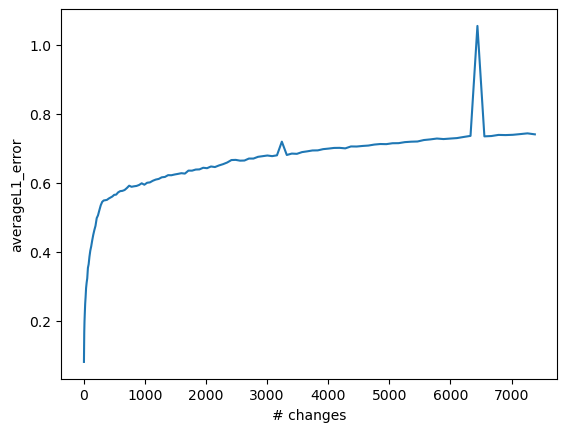

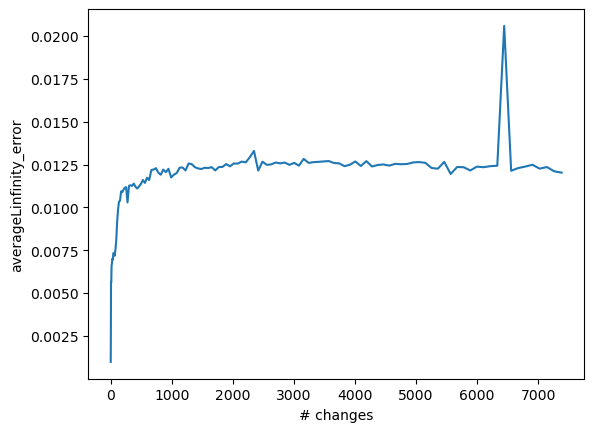

In [15]:
L1_error_graph(L1_metric)
Linfinity_error_graph(Linfinity_metric)